## IITGN Internship Qualification Task

### Project 5: ML for Sustainability: Satellite Data Processing for Detecting Pollution Sources 

#### -----------------------------------------------------------------------------------------------------------------------

### Five class Classifiction

In [1]:
# importing the required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define the paths
source_dir = 'dataset2'
target_dir = 'split2'

# Create target directories if they don't exist
for split in ['train', 'test', 'val']:
    os.makedirs(os.path.join(target_dir, split, 'antelope'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, split, 'badger'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, split, 'cat'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, split, 'dolphin'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, split, 'elephant'), exist_ok=True)

# Function to split data and move files
def split_data(source_dir, target_dir, class_folder):
    files = os.listdir(os.path.join(source_dir, class_folder))
    random.shuffle(files)  # Shuffle the list of files randomly
    train_files, test_val_files = train_test_split(files, test_size=0.25, random_state=42)
    test_files, val_files = train_test_split(test_val_files, test_size=0.4, random_state=42)

    for file in train_files:
        shutil.copy(os.path.join(source_dir, class_folder, file), os.path.join(target_dir, 'train', class_folder))
    for file in test_files:
        shutil.copy(os.path.join(source_dir, class_folder, file), os.path.join(target_dir, 'test', class_folder))
    for file in val_files:
        shutil.copy(os.path.join(source_dir, class_folder, file), os.path.join(target_dir, 'val', class_folder))

# Perform the split for raccoon and non_raccoon classes
split_data(source_dir, target_dir, 'antelope')
split_data(source_dir, target_dir, 'badger')
split_data(source_dir, target_dir, 'cat')
split_data(source_dir, target_dir, 'dolphin')
split_data(source_dir, target_dir, 'elephant')

In [5]:
import os
from PIL import Image

# Function to resize images
def resize_images_in_directory(directory, target_size=(150, 150)):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        resized_img = img.resize(target_size)
                        resized_img.save(file_path)
                        print(f"Resized {file} to {target_size}")
                except Exception as e:
                    print(f"Error resizing {file}: {e}")

# Example usage
directory_path = ["split2/test", "split2/val", "split2/train"]
for i in directory_path:
    resize_images_in_directory(i)

Resized 0b1a3af197.jpg to (150, 150)
Resized 0ee903ea13.jpg to (150, 150)
Resized 1a3f59ee02.jpg to (150, 150)
Resized 1d3c6105c9.jpg to (150, 150)
Resized 24b29ea96e.jpg to (150, 150)
Resized 3a3ea34fb6.jpg to (150, 150)
Resized 41d70d1f6b.jpg to (150, 150)
Resized 7e12bc4942.jpg to (150, 150)
Resized 82e0981104.jpg to (150, 150)
Resized 010fce8ee7.jpg to (150, 150)
Resized 0836f4eb45.jpg to (150, 150)
Resized 147a5daad3.jpg to (150, 150)
Resized 2a8b186a9d.jpg to (150, 150)
Resized 5bffbd51cf.jpg to (150, 150)
Resized 63ecc10a24.jpg to (150, 150)
Resized 68d85c376b.jpg to (150, 150)
Resized 6f6978e81e.jpg to (150, 150)
Resized 709f331442.jpg to (150, 150)
Resized 094ac674a9.jpg to (150, 150)
Resized 124eecb74f.jpg to (150, 150)
Resized 1f016e1910.jpg to (150, 150)
Resized 32cd00f171.jpg to (150, 150)
Resized 354bb2acdf.jpg to (150, 150)
Resized 66548aefad.jpg to (150, 150)
Resized 71c2375c64.jpg to (150, 150)
Resized 7f923c6676.jpg to (150, 150)
Resized 83e8a824a2.jpg to (150, 150)
R

#### Augmentation

In [12]:
import os, shutil, random
from turtle import mode
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

source_dir = 'split2/train/elephant'

augmented_dir = 'split2/train/elephant/augmented'
os.makedirs(augmented_dir, exist_ok=True)

datagen = ImageDataGenerator(
    rescale=128./255,              # Rescale pixel values to [0, 1]
    brightness_range=[0.5, 1.5],   # Random brightness adjustment
    zoom_range=[0.8, 1.2],         # Random zooming
    fill_mode='nearest',           # Fill mode for filling pixels after augmentation
    horizontal_flip=True,          # Random horizontal flipping
    vertical_flip=True,            # Random vertical flipping
    rotation_range=30,             # Random rotations
    shear_range=0.3,               # Random shearing
)

image_files = [i for i in os.listdir(source_dir) if i.endswith('.jpg')]
print(len(image_files))

target_count = 255

45


In [13]:
# Loop until the target count is reached
generated_count = 0
print(f'Generating {target_count} augmented images...', end='\n\n')
with tqdm(total=target_count, desc="Augmentation Progress") as pbar:
    while generated_count < target_count:
        # Randomly select an image from the original dataset
        image_file = np.random.choice(image_files)
        image_path = os.path.join(source_dir, image_file)

        # Load the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure it's in RGB format

        # Generate augmented images using the data generator
        aug_iter = datagen.flow(np.expand_dims(image, axis=0), batch_size=1)
        augmented_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(5)]  # Create 5 augmented images per original

        # Save the augmented images
        for i, aug_image in enumerate(augmented_images):
            aug_filename = f'augmented_{generated_count + i}.jpg'
            aug_image_path = os.path.join(augmented_dir, aug_filename)
            cv2.imwrite(aug_image_path, cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))

        # Update the count of generated images
        generated_count += len(augmented_images)
        # if generated_count % 6000 == 0:
        #     print(f'{generated_count} images generated...')
        pbar.update(len(augmented_images))

print(f'Generated {generated_count} augmented images.')

Generating 255 augmented images...



Augmentation Progress: 100%|██████████| 255/255 [00:01<00:00, 207.36it/s]

Generated 255 augmented images.


#### Splitting

In [1]:
# Loading dataset
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def create_dataset_from_directory(directory):
    x = []
    y = []
    for class_label, class_name in enumerate(['antelope', 'badger', 'cat', 'dolphin', 'elephant']):
        class_dir = os.path.join(directory, class_name)
        for file in os.listdir(class_dir):
            if file.endswith((".jpg", ".jpeg", ".png")):
                file_path = os.path.join(class_dir, file)
                try:
                    with Image.open(file_path) as img:
                        # Note: No resizing here, only loading and normalization
                        img = np.array(img) / 255.0  # Normalize pixel values
                        x.append(img)
                        y.append(class_label)
                except Exception as e:
                    print(f"Error loading {file}: {e}")
    return np.array(x), np.array(y)

# Define paths
train_dir = 'split2/train'
test_dir = 'split2/test'
val_dir = 'split2/val'

# Load and preprocess images
x_train, y_train = create_dataset_from_directory(train_dir)
x_test, y_test = create_dataset_from_directory(test_dir)
x_val, y_val = create_dataset_from_directory(val_dir)
y_train_encoded = to_categorical(y_train, num_classes=5)
y_val_encoded = to_categorical(y_val, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)
# Print shapes of datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print("y_train_encoded shape:", y_train_encoded.shape)
print("y_val_encoded shape:", y_val_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

x_train shape: (1500, 150, 150, 3)
y_train shape: (1500,)
x_test shape: (45, 150, 150, 3)
y_test shape: (45,)
x_val shape: (30, 150, 150, 3)
y_val shape: (30,)
y_train_encoded shape: (1500, 5)
y_val_encoded shape: (30, 5)
y_test_encoded shape: (45, 5)


#### Custom CNN

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Layer 1: Convolutional layer with 3x3 kernel and 64 filters
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Layer 2: MaxPooling layer
model.add(MaxPooling2D((2, 2)))

# Layer 3: Convolutional layer with 5x5 kernel and 128 filters
model.add(Conv2D(128, (5, 5), activation='relu'))

# Layer 4: MaxPooling layer
model.add(MaxPooling2D((2, 2)))

# Layer 5: Convolutional layer with 7x7 kernel and 256 filters
model.add(Conv2D(256, (7, 7), activation='relu'))

# Layer 6: MaxPooling layer
model.add(MaxPooling2D((2, 2)))

# Layer 7: Convolutional layer with 512 filters
model.add(Conv2D(512, (3, 3), activation='relu'))

# Layer 8: MaxPooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output before feeding into the fully connected layers
model.add(Flatten())

# Layer 9: Fully connected layer with 512 units
model.add(Dense(512, activation='relu'))

# Layer 10: Output layer with 5 units for 5 classes
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train_encoded,
                    epochs=50,
                    validation_data=(x_val, y_val_encoded))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Save the model as 'new_model'
model.save('new_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 70, 70, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 256)       1605888   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 256)      0

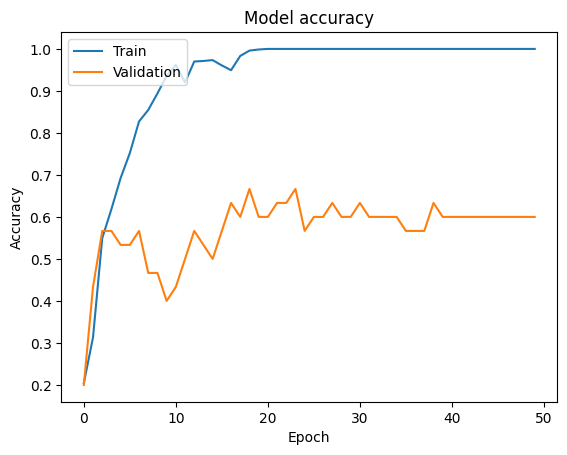

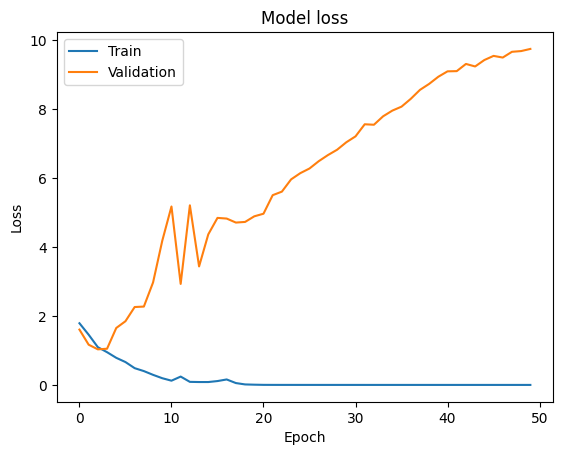

2/2 [==============================] - 0s 186ms/step


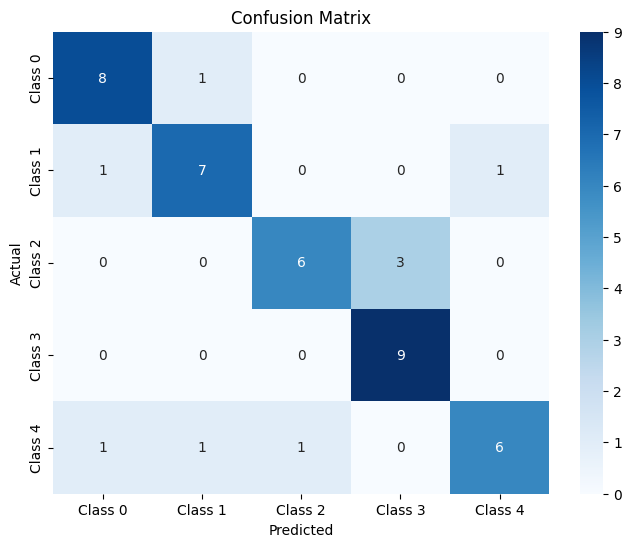

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to categorical labels
y_true = np.argmax(y_test_encoded, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
